# **1.Preprocessing Data**

Calcualtaing new columns, one hot encoding categorical data,handling missing data

Loading data from google drive

In [1]:
import os
import pandas as pd


folder_path = '/content/drive/MyDrive/Warsaw_Real_Estate/RAW_DATA/'


files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]


df_list = []


for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df['source_file'] = file
    df_list.append(df)


combined_df = pd.concat(df_list, ignore_index=True)

combined_df.to_csv('combined_file.csv', index=False)

print("All files have been combined with the 'source_file' column indicating the origin of each data point.")


All files have been combined with the 'source_file' column indicating the origin of each data point.


In [2]:
len(combined_df)

195568

In [3]:
data=combined_df

In [4]:
data.iloc[0:4]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,source_file
0,0d9b89891919809b6465f1f8bd942c62,szczecin,blockOfFlats,82.20,4.0,3.0,4.0,1981.0,53.451900,14.560600,...,condominium,concreteSlab,NaN,yes,no,no,no,yes,669000,apartments_pl_2023_11.csv
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,condominium,brick,NaN,no,no,no,no,no,650000,apartments_pl_2023_11.csv
2,546fbb3c9042fc833149173fc6a2240f,szczecin,blockOfFlats,28.13,1.0,NaN,5.0,1965.0,53.427312,14.549056,...,condominium,brick,NaN,no,no,no,no,yes,319500,apartments_pl_2023_11.csv
3,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,...,condominium,brick,NaN,no,yes,no,no,yes,550000,apartments_pl_2023_11.csv


Filtering rows by city

In [5]:
data = data[data['city'].str.lower() == 'warszawa']

In [6]:
data.iloc[0:4]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,source_file
10627,7dcdcb15c51d7247cb4df06d97f86a4c,warszawa,blockOfFlats,77.0,3.0,2.0,2.0,2022.0,52.33110,21.04670,...,condominium,NaN,NaN,yes,yes,yes,yes,no,950000,apartments_pl_2023_11.csv
10628,93c2f9daa4358a8dc60614a89f21581a,warszawa,NaN,64.9,3.0,NaN,10.0,1979.0,52.15824,21.03303,...,condominium,NaN,NaN,no,yes,no,no,yes,799000,apartments_pl_2023_11.csv
10629,b382b39d9011ff3e377aafae96dbf6fe,warszawa,blockOfFlats,62.2,4.0,4.0,4.0,1981.0,52.19279,20.86623,...,condominium,concreteSlab,NaN,no,yes,no,no,yes,680000,apartments_pl_2023_11.csv
10630,a627c7b97fa0edcd903f056f8d1cb293,warszawa,NaN,77.0,3.0,4.0,9.0,2007.0,52.28975,21.03048,...,condominium,NaN,NaN,no,no,yes,no,no,1100000,apartments_pl_2023_11.csv


In [7]:
import pandas as pd
import re


data['year'] = data['source_file'].apply(lambda x: re.search(r'(\d{4})', x).group(0)[-2:])
data['month'] = data['source_file'].apply(lambda x: re.search(r'(\d{2})(?=\.csv)', x).group(0))


all_months = [f'{i:02d}' for i in range(1, 13)]


for month in all_months:
    data[f'month_{month}'] = 0


for index, row in data.iterrows():
    data.loc[index, f'month_{row["month"]}'] = 1

data = data.drop(columns=['month'])




<ipython-input-7-ef2b58d24526>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['source_file'].apply(lambda x: re.search(r'(\d{4})', x).group(0)[-2:])
<ipython-input-7-ef2b58d24526>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['source_file'].apply(lambda x: re.search(r'(\d{2})(?=\.csv)', x).group(0))
<ipython-input-7-ef2b58d24526>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [8]:
data.iloc[0:4]


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
10627,7dcdcb15c51d7247cb4df06d97f86a4c,warszawa,blockOfFlats,77.0,3.0,2.0,2.0,2022.0,52.33110,21.04670,...,0,0,0,0,0,0,0,0,1,0
10628,93c2f9daa4358a8dc60614a89f21581a,warszawa,NaN,64.9,3.0,NaN,10.0,1979.0,52.15824,21.03303,...,0,0,0,0,0,0,0,0,1,0
10629,b382b39d9011ff3e377aafae96dbf6fe,warszawa,blockOfFlats,62.2,4.0,4.0,4.0,1981.0,52.19279,20.86623,...,0,0,0,0,0,0,0,0,1,0
10630,a627c7b97fa0edcd903f056f8d1cb293,warszawa,NaN,77.0,3.0,4.0,9.0,2007.0,52.28975,21.03048,...,0,0,0,0,0,0,0,0,1,0


In [9]:
len(data)

59246

In [10]:
data["year"]

,year
10627,23
10628,23
10629,23
10630,23
10631,23
...,...
194733,24
194734,24
194735,24
194736,24


Assignment to districts by location

In [11]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point


geojson_path = '/content/drive/MyDrive/WORKSPACE_DATA/MAPA.JSON'
districts_gdf = gpd.read_file(geojson_path)


data = data


flats_gdf = gpd.GeoDataFrame(
    data,
    geometry=[Point(xy) for xy in zip(data['longitude'], data['latitude'])],
    crs="EPSG:4326"
)


data = gpd.sjoin(flats_gdf, districts_gdf, how="left", predicate='within')


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: Several features with id = 16 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


In [12]:
data.iloc[0:4]

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,month_06,month_07,month_08,month_09,month_10,month_11,month_12,geometry,index_right,Warszawa
10627,7dcdcb15c51d7247cb4df06d97f86a4c,warszawa,blockOfFlats,77.0,3.0,2.0,2.0,2022.0,52.33110,21.04670,...,0,0,0,0,0,1,0,POINT (21.0467 52.3311),0.0,Białołęka
10628,93c2f9daa4358a8dc60614a89f21581a,warszawa,NaN,64.9,3.0,NaN,10.0,1979.0,52.15824,21.03303,...,0,0,0,0,0,1,0,POINT (21.03303 52.15824),8.0,Ursynów
10629,b382b39d9011ff3e377aafae96dbf6fe,warszawa,blockOfFlats,62.2,4.0,4.0,4.0,1981.0,52.19279,20.86623,...,0,0,0,0,0,1,0,POINT (20.86623 52.19279),17.0,Ursus
10630,a627c7b97fa0edcd903f056f8d1cb293,warszawa,NaN,77.0,3.0,4.0,9.0,2007.0,52.28975,21.03048,...,0,0,0,0,0,1,0,POINT (21.03048 52.28975),7.0,Targówek


In [13]:
data.head(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,month_06,month_07,month_08,month_09,month_10,month_11,month_12,geometry,index_right,Warszawa
10627,7dcdcb15c51d7247cb4df06d97f86a4c,warszawa,blockOfFlats,77.0,3.0,2.0,2.0,2022.0,52.33110,21.04670,...,0,0,0,0,0,1,0,POINT (21.0467 52.3311),0.0,Białołęka
10628,93c2f9daa4358a8dc60614a89f21581a,warszawa,NaN,64.9,3.0,NaN,10.0,1979.0,52.15824,21.03303,...,0,0,0,0,0,1,0,POINT (21.03303 52.15824),8.0,Ursynów
10629,b382b39d9011ff3e377aafae96dbf6fe,warszawa,blockOfFlats,62.2,4.0,4.0,4.0,1981.0,52.19279,20.86623,...,0,0,0,0,0,1,0,POINT (20.86623 52.19279),17.0,Ursus
10630,a627c7b97fa0edcd903f056f8d1cb293,warszawa,NaN,77.0,3.0,4.0,9.0,2007.0,52.28975,21.03048,...,0,0,0,0,0,1,0,POINT (21.03048 52.28975),7.0,Targówek
10631,33434635c6879409b21a7e0de5ffb2e7,warszawa,blockOfFlats,73.4,3.0,6.0,10.0,2007.0,52.24329,21.08484,...,0,0,0,0,0,1,0,POINT (21.08484 52.24329),4.0,Praga-południe


In [14]:
data=data.drop(columns=['index_right','geometry'])

In [15]:
data.rename(columns={'Warszawa': 'district'}, inplace=True)

In [16]:
nan_count = data['district'].isna().sum()
print(nan_count)

print(f"{nan_count/len(data)*100:.3}% of data dont have any district. These flats are propably out of city boundries, we can just drop them")

108
0.182% of data dont have any district. These flats are propably out of city boundries, we can just drop them


In [17]:
data.dropna(subset=['district'], inplace=True)

In [18]:
!pip install unidecode

from unidecode import unidecode
data['district'] = data['district'].apply(unidecode)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 13.7 MB/s eta 0:00:00


In [19]:
data.head(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,district
10627,7dcdcb15c51d7247cb4df06d97f86a4c,warszawa,blockOfFlats,77.0,3.0,2.0,2.0,2022.0,52.33110,21.04670,...,0,0,0,0,0,0,0,1,0,Bialoleka
10628,93c2f9daa4358a8dc60614a89f21581a,warszawa,NaN,64.9,3.0,NaN,10.0,1979.0,52.15824,21.03303,...,0,0,0,0,0,0,0,1,0,Ursynow
10629,b382b39d9011ff3e377aafae96dbf6fe,warszawa,blockOfFlats,62.2,4.0,4.0,4.0,1981.0,52.19279,20.86623,...,0,0,0,0,0,0,0,1,0,Ursus
10630,a627c7b97fa0edcd903f056f8d1cb293,warszawa,NaN,77.0,3.0,4.0,9.0,2007.0,52.28975,21.03048,...,0,0,0,0,0,0,0,1,0,Targowek
10631,33434635c6879409b21a7e0de5ffb2e7,warszawa,blockOfFlats,73.4,3.0,6.0,10.0,2007.0,52.24329,21.08484,...,0,0,0,0,0,0,0,1,0,Praga-poludnie


Calculating distance to ammenities

We are loading file with coordinates of places like
Metro stations,Train stations,Tram stops,Bus stops, Malls.

In [20]:
import json
import pandas as pd


def data_from_geojson(geojson_path):
    with open(geojson_path, 'r', encoding='utf-8') as file:
        geojson_data = json.load(file)


    extracted_data = []
    for feature in geojson_data['features']:
        name = feature['properties'].get('name', 'No Name')

        coordinates = feature['geometry']['coordinates']
        longitude, latitude = coordinates[0], coordinates[1]
        extracted_data.append({
            'name': name,
            'longitude': longitude,
            'latitude': latitude
        })

    extracted_data=pd.DataFrame(extracted_data)
    extracted_data['name'] = extracted_data['name'].apply(unidecode)

    return extracted_data


Train_data= data_from_geojson("/content/drive/MyDrive/Warsaw_Real_Estate/RAW_DATA/Train_Warsaw.geojson")
Metro_data= data_from_geojson("/content/drive/MyDrive/Warsaw_Real_Estate/RAW_DATA/Metro_Warsaw.geojson")
Tram_data= data_from_geojson("/content/drive/MyDrive/Warsaw_Real_Estate/RAW_DATA/Tram_Warsaw.geojson")
Bus_data= data_from_geojson("/content/drive/MyDrive/Warsaw_Real_Estate/RAW_DATA/Bus_Warsaw.geojson")



In [21]:
import geopandas as gpd

file_path = '/content/drive/MyDrive/Warsaw_Real_Estate/RAW_DATA/Mall_Warsaw.geojson'
geo_data = gpd.read_file(file_path)


geo_data['centroid'] = geo_data.geometry.centroid


geo_data['latitude'] = geo_data['centroid'].y
geo_data['longitude'] = geo_data['centroid'].x

Mall_data = geo_data[['name', 'latitude', 'longitude']]
Mall_data=Mall_data.dropna()
Mall_data=pd.DataFrame(Mall_data)

Mall_data['name'] = Mall_data['name'].apply(unidecode)


<ipython-input-21-5151d2968223>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_data['centroid'] = geo_data.geometry.centroid


In [22]:
Mall_data.head(5)

,name,latitude,longitude
0,Wola Park,52.241977,20.931946
1,Galeria Bemowo,52.263904,20.930946
2,King Cross Praga,52.235272,21.119439
3,Atrium Targowek,52.303922,21.057924
4,Westfield Mokotow,52.179885,21.004344


In [23]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371
    return c * r

def calculate_closest_station_distance(data, station_data, distance_column_name, station_column_name):

    flats_coords = np.radians(data[['latitude', 'longitude']])
    stations_coords = np.radians(station_data[['latitude', 'longitude']])


    tree = BallTree(stations_coords, metric='haversine')


    distances, indices = tree.query(flats_coords, k=1)


    distances_km = distances * 6371

    data[distance_column_name] = distances_km.flatten()
    data[station_column_name] = station_data.iloc[indices.flatten()]['name'].values


calculate_closest_station_distance(data, Train_data, "Train_distance", "Train_name")
calculate_closest_station_distance(data, Metro_data, "Metro_distance", "Metro_name")
calculate_closest_station_distance(data, Tram_data, "Tram_distance", "Tram_name")
calculate_closest_station_distance(data, Bus_data, "Bus_distance", "Bus_name")
calculate_closest_station_distance(data, Mall_data, "Mall_distance", "Mall_name")


In [24]:
data.head(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,Train_distance,Train_name,Metro_distance,Metro_name,Tram_distance,Tram_name,Bus_distance,Bus_name,Mall_distance,Mall_name
10627,7dcdcb15c51d7247cb4df06d97f86a4c,warszawa,blockOfFlats,77.0,3.0,2.0,2.0,2022.0,52.33110,21.04670,...,3.753889,Warszawa Zeran,4.341558,Kondratowicza,3.209673,Zeran Wschodni 03,0.028817,Malych Debow 01,1.915986,"Centrum Handlowe ""Bialolecka"""
10628,93c2f9daa4358a8dc60614a89f21581a,warszawa,NaN,64.9,3.0,NaN,10.0,1979.0,52.15824,21.03303,...,3.224975,Warszawa Okecie,0.266926,Stoklosy,1.587389,Wyscigi 05,0.164718,Metro Stoklosy 04,0.776326,KEN Center
10629,b382b39d9011ff3e377aafae96dbf6fe,warszawa,blockOfFlats,62.2,4.0,4.0,4.0,1981.0,52.19279,20.86623,...,0.297302,Warszawa Ursus Niedzwiadek,6.156121,Bemowo,4.717277,Cieplownia Wola 08,0.154140,Keniga 02,0.411595,Galeria Ursus
10630,a627c7b97fa0edcd903f056f8d1cb293,warszawa,NaN,77.0,3.0,4.0,9.0,2007.0,52.28975,21.03048,...,1.284588,Warszawa Torunska,0.439052,Brodno,0.059696,Poborzanska 02,0.165139,Rembielinska 02,0.027707,Galeria Renova
10631,33434635c6879409b21a7e0de5ffb2e7,warszawa,blockOfFlats,73.4,3.0,6.0,10.0,2007.0,52.24329,21.08484,...,1.358428,Warszawa Grochow,2.886396,Stadion Narodowy,0.138567,Wiatraczna 06,0.012026,Wiatraczna 10,0.134039,Rondo Wiatraczna


Handling missing data

In [25]:
for x in data.columns:
    if data[x].isna().sum() != 0:
        print(f"{x}: {(data[x].isna().sum())/len(data)*100:.3}%")

type: 25.1%
floor: 15.2%
floorCount: 0.969%
buildYear: 9.46%
schoolDistance: 0.00676%
clinicDistance: 0.409%
postOfficeDistance: 0.0727%
kindergartenDistance: 0.0744%
restaurantDistance: 0.364%
collegeDistance: 2.23%
pharmacyDistance: 0.144%
buildingMaterial: 42.1%
condition: 76.3%
hasElevator: 4.05%


In [26]:
data.iloc[0]

,10627
id,7dcdcb15c51d7247cb4df06d97f86a4c
city,warszawa
type,blockOfFlats
squareMeters,77.0
rooms,3.0
floor,2.0
floorCount,2.0
buildYear,2022.0
latitude,52.3311
longitude,21.0467


In [27]:
data["year"]

,year
10627,23
10628,23
10629,23
10630,23
10631,23
...,...
194733,24
194734,24
194735,24
194736,24


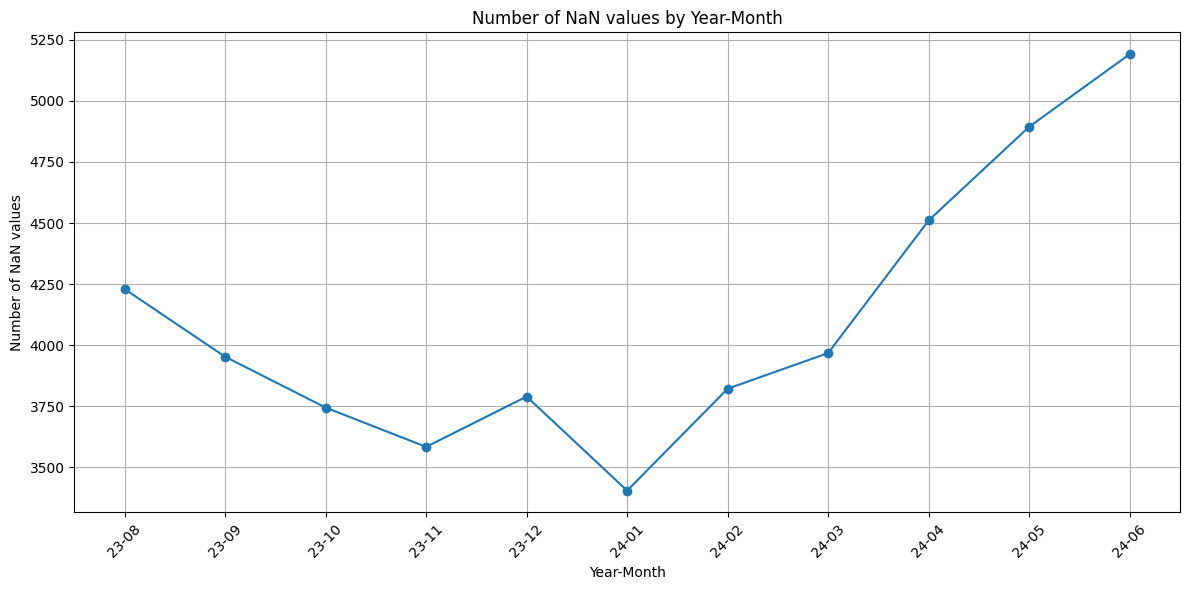

In [28]:
import matplotlib.pyplot as plt
import pandas as pd


data['year_month'] = data['year'] + '-' + data.apply(lambda x: [k for k,v in x.items() if v == 1 and 'month' in k][0][-2:], axis=1)

nan_count = data['condition'].isna().groupby(data['year_month']).sum()

plt.figure(figsize=(12, 6))
plt.plot(nan_count.index, nan_count.values, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of NaN values')
plt.title('Number of NaN values by Year-Month')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


WE now can see from what period most of NAN's is.

Condition -76.3%

We will do same thing we did in previous anaysis. Datapoints where condition is NAN, are just normal condition flats, and thats what we goona do, mark all NANs as normal condition

In [29]:

data['condition'].fillna('normal', inplace=True)


<ipython-input-29-69068dce8c4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['condition'].fillna('normal', inplace=True)


Building Material - 42.1%

Too much data to drop. Building material is crucial, so we can't just guess and put here some data that wee think, may be true. We will do "Unknown" category, to not mess with identification impact of other materials

In [30]:
data['buildingMaterial'].fillna('UNKNOWN', inplace=True)

<ipython-input-30-ff42dbc7c573>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['buildingMaterial'].fillna('UNKNOWN', inplace=True)


Type - 25%



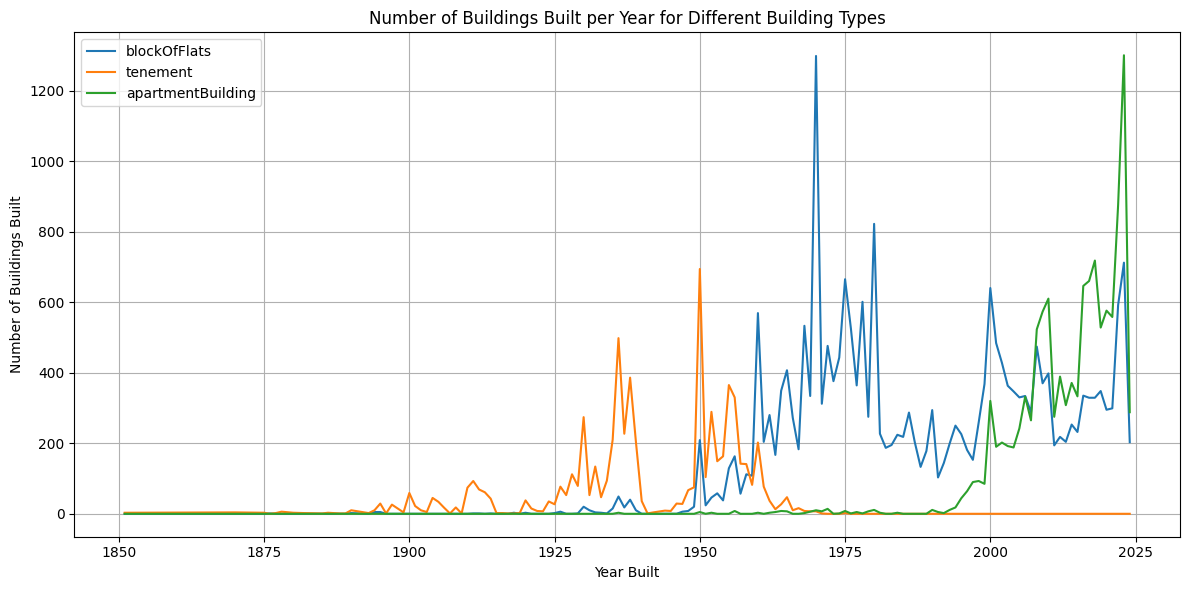

In [31]:
import matplotlib.pyplot as plt


filtered_data = data[['buildYear', 'type']].dropna(subset=['buildYear'])


building_counts = filtered_data.groupby(['buildYear', 'type']).size().unstack(fill_value=0)


building_types = ['blockOfFlats', 'tenement', 'apartmentBuilding']
building_counts_filtered = building_counts[building_types]

plt.figure(figsize=(12, 6))
for building_type in building_types:
    plt.plot(building_counts_filtered.index, building_counts_filtered[building_type], label=building_type)

plt.xlabel('Year Built')
plt.ylabel('Number of Buildings Built')
plt.title('Number of Buildings Built per Year for Different Building Types')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


BuildYear is strong indicator what type of building can it be.
We can make strict table with time periods, and say that buildings from this period are block of flats, and from other period are tenements, but we can do something better. We will do table, that shows, percentage of every type build this year. This percentage will be propability that NA have to be assigned to specific type.

But there is one problem

Build Year - 9.46%

To properly assign type, we need properly assigned Build year and vice versa. Based on type we can assign year. But data point need at least one of that,

In [32]:

filtered_data = data[['buildYear', 'type']].dropna(subset=['buildYear', 'type'])


building_counts = filtered_data.groupby(['buildYear', 'type']).size().unstack(fill_value=0)


building_percentages = building_counts.div(building_counts.sum(axis=1), axis=0) * 100


building_types = ['blockOfFlats', 'tenement', 'apartmentBuilding']
Type_Year_percentages = building_percentages[building_types].reset_index()
Type_Year_counts = building_counts[building_types].reset_index()



Type_Year_percentages.columns = ['year', 'blockOfFlats', 'tenement', 'apartmentBuilding']

Type_Year_counts.columns = ['year', 'blockOfFlats', 'tenement', 'apartmentBuilding']




In [33]:
Type_Year_percentages.head(5)

,year,blockOfFlats,tenement,apartmentBuilding
0,1851.0,0.0,100.0,0.0
1,1870.0,0.0,100.0,0.0
2,1875.0,0.0,100.0,0.0
3,1876.0,100.0,0.0,0.0
4,1877.0,0.0,100.0,0.0


In [34]:
Type_Year_counts.head(5)

,year,blockOfFlats,tenement,apartmentBuilding
0,1851.0,0,3,0
1,1870.0,0,4,0
2,1875.0,0,3,0
3,1876.0,1,0,0
4,1877.0,0,2,0


In [35]:
blockOfFlats_count=Type_Year_counts["blockOfFlats"].sum()
tenement_count=Type_Year_counts["tenement"].sum()
apartmentBuilding_count=Type_Year_counts["apartmentBuilding"].sum()

In [36]:
print(f"{blockOfFlats_count} , {tenement_count} , {apartmentBuilding_count}")

23663 , 6419 , 12010


In [37]:
for x in range(len(Type_Year_counts)):
    Type_Year_counts.loc[x, 'blockOfFlats'] = (Type_Year_counts.loc[x, 'blockOfFlats'] / blockOfFlats_count) * 100
    Type_Year_counts.loc[x, 'tenement'] = (Type_Year_counts.loc[x, 'tenement'] / tenement_count) * 100
    Type_Year_counts.loc[x, 'apartmentBuilding'] = (Type_Year_counts.loc[x, 'apartmentBuilding'] / apartmentBuilding_count) * 100


<ipython-input-37-3b663c4a9738>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04673625175260944' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Type_Year_counts.loc[x, 'tenement'] = (Type_Year_counts.loc[x, 'tenement'] / tenement_count) * 100
<ipython-input-37-3b663c4a9738>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.004226006846131091' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Type_Year_counts.loc[x, 'blockOfFlats'] = (Type_Year_counts.loc[x, 'blockOfFlats'] / blockOfFlats_count) * 100
<ipython-input-37-3b663c4a9738>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.02497918401332223' has dtype incompatible with int64, please explicitly cas

In [38]:
Type_Year_counts

,year,blockOfFlats,tenement,apartmentBuilding
0,1851.0,0.000000,0.046736,0.000000
1,1870.0,0.000000,0.062315,0.000000
2,1875.0,0.000000,0.046736,0.000000
3,1876.0,0.004226,0.000000,0.000000
4,1877.0,0.000000,0.031158,0.000000
...,...,...,...,...
138,2020.0,1.246672,0.000000,4.796003
139,2021.0,1.263576,0.000000,4.646128
140,2022.0,2.501796,0.000000,7.293922
141,2023.0,3.008917,0.000000,10.824313


Guessing BuildYear by type

In [39]:
import numpy as np

def assign_buildyear_based_on_type(data, Type_Year_counts):

    building_types = ['blockOfFlats', 'tenement', 'apartmentBuilding']

    for building_type in building_types:
        missing_buildYear_idx = data[(data['buildYear'].isna()) & (data['type'] == building_type)].index


        years = Type_Year_counts['year']
        probabilities = Type_Year_counts[building_type].values / Type_Year_counts[building_type].sum()


        assigned_years = np.random.choice(years, size=len(missing_buildYear_idx), p=probabilities)


        data.loc[missing_buildYear_idx, 'buildYear'] = assigned_years


assign_buildyear_based_on_type(data, Type_Year_counts)


In [40]:

missing_buildyear_type = data[(data['buildYear'].isna()) & (data['type'].isna())]


missing_count = missing_buildyear_type.shape[0]

print(f"That many data rows dont have BuildYear and type:  {missing_count/len(data)*100:.3}%")


That many data rows dont have BuildYear and type:  5.69%


We need another estimator. 6% is a little bit to much to drop, but not to too much to estimate value, since we have a lot of indicators that can help us find build year.

In [41]:
for x in data.columns:
    if data[x].isna().sum() != 0:
        print(f"{x}: {(data[x].isna().sum())/len(data)*100:.3}%")

type: 25.1%
floor: 15.2%
floorCount: 0.969%
buildYear: 5.69%
schoolDistance: 0.00676%
clinicDistance: 0.409%
postOfficeDistance: 0.0727%
kindergartenDistance: 0.0744%
restaurantDistance: 0.364%
collegeDistance: 2.23%
pharmacyDistance: 0.144%
hasElevator: 4.05%


Guessing buildYear by amenities and buildingMaterial

<ipython-input-42-eea719c7f26a>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_data[amenities] = filtered_data[amenities].applymap(lambda x: 1 if x == 'yes' else 0)


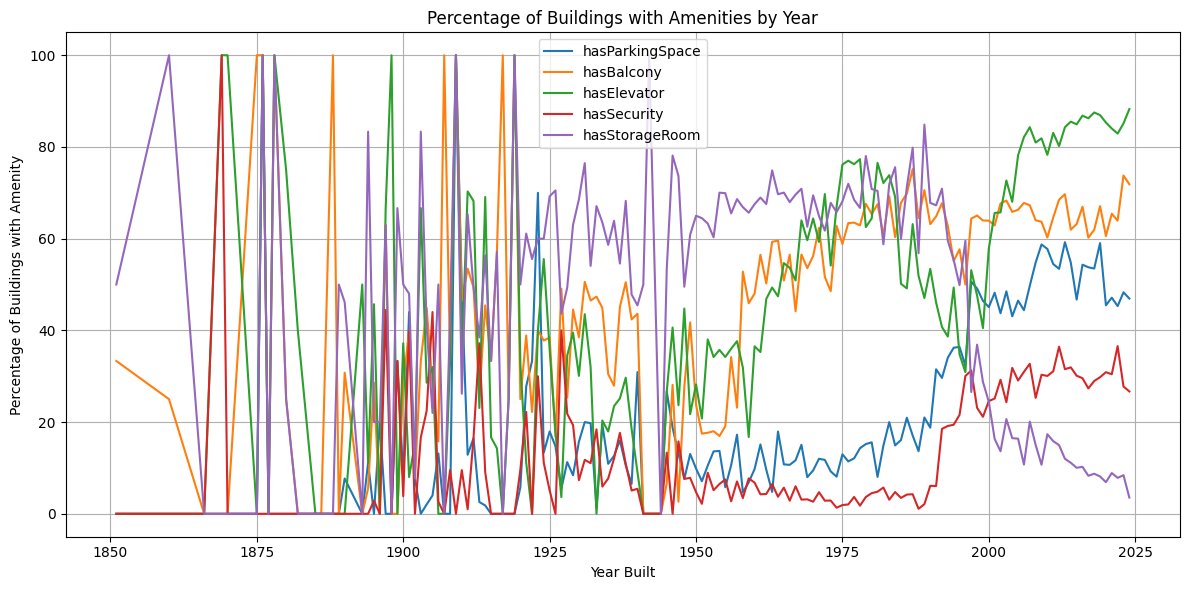

In [42]:
import matplotlib.pyplot as plt




amenities = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']


filtered_data = data[['buildYear'] + amenities].dropna(subset=['buildYear'])

filtered_data[amenities] = filtered_data[amenities].applymap(lambda x: 1 if x == 'yes' else 0)


amenities_percentage = filtered_data.groupby('buildYear')[amenities].mean() * 100


plt.figure(figsize=(12, 6))
for amenity in amenities:
    plt.plot(amenities_percentage.index, amenities_percentage[amenity], label=amenity)

plt.xlabel('Year Built')
plt.ylabel('Percentage of Buildings with Amenity')
plt.title('Percentage of Buildings with Amenities by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


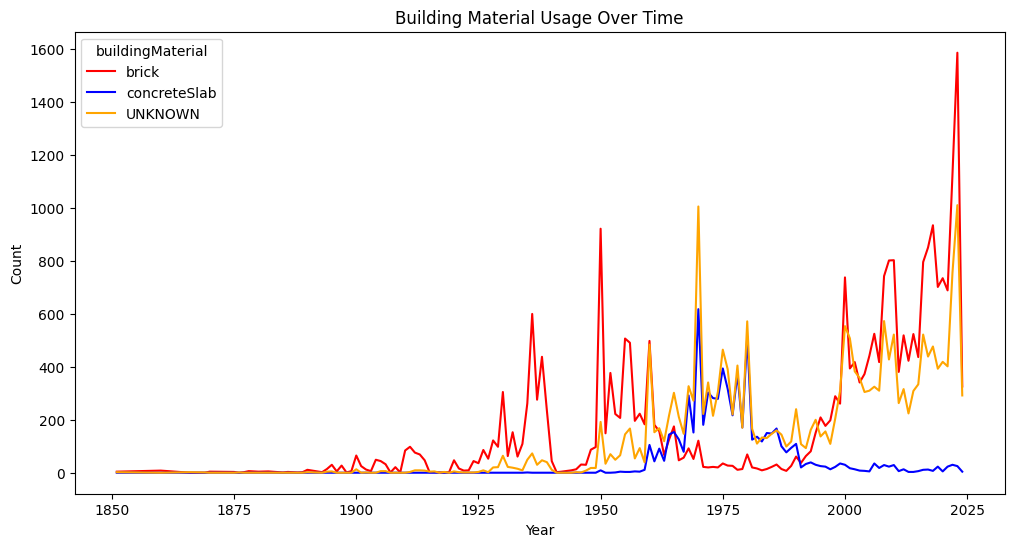

In [43]:
import matplotlib.pyplot as plt
import pandas as pd



material_counts = data.groupby(['buildYear', 'buildingMaterial']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 6))


plt.plot(material_counts.index, material_counts['brick'], label='brick', color='RED')
plt.plot(material_counts.index, material_counts['concreteSlab'], label='concreteSlab', color='BLUE')
plt.plot(material_counts.index, material_counts['UNKNOWN'], label='UNKNOWN', color='orange')


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Building Material Usage Over Time')


plt.legend(title='buildingMaterial')


plt.show()


There is big correlation between buildyear, material and amenities in the flat.
We can distinguish two groups. Soviet times and modern times.
Soviet flats have Storage rooms,and nearly no security
Modern apartments storage rooms are rare, but security is much more common.


*   if is out of concrete slabs, we will assign random year between 1960 and 1990
*   if flat have storage room, we will assign random year between 1950 and 1990
*   If flat have security, we will assign random year between 1990 and 2024
*   If flat dont have any of it, we will check for parking space, it is common in modern times so flat will be randomly assigned to modern



There is few more we can guess but this four seems most reliable and shows biggest correlation.

In [44]:
import numpy as np
import random


def assign_year(row):
    if pd.isna(row['buildYear']):

        if row['buildingMaterial'] == "concreteSlab":
            return random.randint(1960, 1990)

        elif row['hasStorageRoom'] == "yes":
            return random.randint(1950, 1990)

        elif row['hasSecurity'] == "yes" and row['hasStorageRoom'] == "no":
            return random.randint(1990, 2022)
        elif row['hasParkingSpace'] == "yes":
            return random.randint(1990, 2022)

    return row['buildYear']


data['buildYear'] = data.apply(assign_year, axis=1)




In [45]:
print(f"That many data rows dont have BuildYear:  {data['buildYear'].isna().sum()/len(data)*100:.3}%")

That many data rows dont have BuildYear:  3.99%


Now we have only 4% of buildYear missing. We made all our best guesses, the ones that was relatively obvious and not very risky. Instead of making less obvious guesses, and maybe messing a little our data dependencies, We can just drop this 4%

In [46]:
data = data.dropna(subset=['buildYear'])

And now we can finally set missing type values

In [47]:
Type_Year_percentages

,year,blockOfFlats,tenement,apartmentBuilding
0,1851.0,0.000000,100.0,0.000000
1,1870.0,0.000000,100.0,0.000000
2,1875.0,0.000000,100.0,0.000000
3,1876.0,100.000000,0.0,0.000000
4,1877.0,0.000000,100.0,0.000000
...,...,...,...,...
138,2020.0,33.869116,0.0,66.130884
139,2021.0,34.889148,0.0,65.110852
140,2022.0,40.326975,0.0,59.673025
141,2023.0,35.387674,0.0,64.612326


In [48]:
import numpy as np

def assign_type_based_on_year(data, Type_Year_percentages):

    missing_type_idx = data[data['type'].isna()].index


    for idx in missing_type_idx:
        build_year = data.loc[idx, 'buildYear']


        year_row = Type_Year_percentages[Type_Year_percentages['year'] == build_year]

        if not year_row.empty:

            probabilities = year_row[['blockOfFlats', 'tenement', 'apartmentBuilding']].values.flatten()
            types = ['blockOfFlats', 'tenement', 'apartmentBuilding']


            probabilities /= probabilities.sum()


            assigned_type = np.random.choice(types, p=probabilities)


            data.loc[idx, 'type'] = assigned_type


assign_type_based_on_year(data, Type_Year_percentages)


Floor - 15.2%

Too much to drop. We could have estimate it, but we dont have as good indicators for floor.

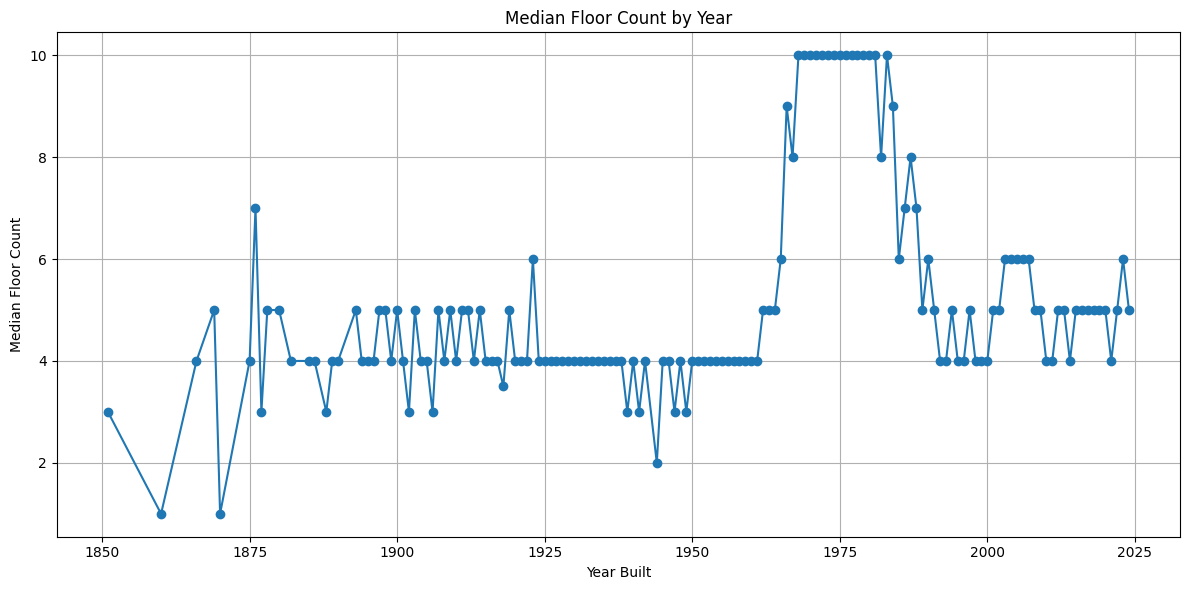

In [49]:
import matplotlib.pyplot as plt

filtered_data = data[['buildYear', 'floorCount']].dropna(subset=['buildYear', 'floorCount'])

median_floor_count = filtered_data.groupby('buildYear')['floorCount'].median()

plt.figure(figsize=(12, 6))
plt.plot(median_floor_count.index, median_floor_count.values, marker='o')
plt.xlabel('Year Built')
plt.ylabel('Median Floor Count')
plt.title('Median Floor Count by Year')
plt.grid(True)
plt.tight_layout()
plt.show()


As we can see all the medianes are fairly low. From our power bi report, we know that any signifact changes in price based on floor, starts after 15 floor, everything below 15 wasn't as different. We will do mediane, but we will check for floorCount, to avoid stupid situations like flat on 6th floor in 5 floor building. But first we also need to drop values where floorCount is NA.

In [50]:
data = data.dropna(subset=['floorCount'])

In [51]:
import pandas as pd

floor_medians = data.groupby('buildYear')['floor'].transform(lambda x: x.fillna(x.median()))

data['floor'] = data['floor'].fillna(floor_medians)

data['floor'] = data.apply(lambda row: min(row['floor'], row['floorCount']) if pd.notna(row['floorCount']) else row['floor'], axis=1)




In [52]:
print((data['floor'].isna().sum()))

9


Some datapoints are still empty, becasue mean can't be calculated when there is no datapoint on which it can be calculated. It is only about one percent of the data so we can drop it without consecuences.

In [53]:
for x in data.columns:
        print(f"{x}: {(data[x].isna().sum())/len(data)*100:.3}%")

id: 0.0%
city: 0.0%
type: 0.0213%
squareMeters: 0.0%
rooms: 0.0%
floor: 0.016%
floorCount: 0.0%
buildYear: 0.0%
latitude: 0.0%
longitude: 0.0%
centreDistance: 0.0%
poiCount: 0.0%
schoolDistance: 0.00709%
clinicDistance: 0.415%
postOfficeDistance: 0.0763%
kindergartenDistance: 0.078%
restaurantDistance: 0.374%
collegeDistance: 2.23%
pharmacyDistance: 0.151%
ownership: 0.0%
buildingMaterial: 0.0%
condition: 0.0%
hasParkingSpace: 0.0%
hasBalcony: 0.0%
hasElevator: 2.8%
hasSecurity: 0.0%
hasStorageRoom: 0.0%
price: 0.0%
source_file: 0.0%
year: 0.0%
month_01: 0.0%
month_02: 0.0%
month_03: 0.0%
month_04: 0.0%
month_05: 0.0%
month_06: 0.0%
month_07: 0.0%
month_08: 0.0%
month_09: 0.0%
month_10: 0.0%
month_11: 0.0%
month_12: 0.0%
district: 0.0%
Train_distance: 0.0%
Train_name: 0.0%
Metro_distance: 0.0%
Metro_name: 0.0%
Tram_distance: 0.0%
Tram_name: 0.0%
Bus_distance: 0.0%
Bus_name: 0.0%
Mall_distance: 0.0%
Mall_name: 0.0%
year_month: 0.0%


Small amount of NAN's

Columns where NAN's are less than 5%, can be just dropped.

In [54]:
data=data.dropna()

In [55]:
len(data)

53212

In [56]:
len(data)

53212

In [57]:
data.head(5)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,Train_name,Metro_distance,Metro_name,Tram_distance,Tram_name,Bus_distance,Bus_name,Mall_distance,Mall_name,year_month
10628,93c2f9daa4358a8dc60614a89f21581a,warszawa,blockOfFlats,64.90,3.0,3.0,10.0,1979.0,52.158240,21.033030,...,Warszawa Okecie,0.266926,Stoklosy,1.587389,Wyscigi 05,0.164718,Metro Stoklosy 04,0.776326,KEN Center,23-11
10629,b382b39d9011ff3e377aafae96dbf6fe,warszawa,blockOfFlats,62.20,4.0,4.0,4.0,1981.0,52.192790,20.866230,...,Warszawa Ursus Niedzwiadek,6.156121,Bemowo,4.717277,Cieplownia Wola 08,0.154140,Keniga 02,0.411595,Galeria Ursus,23-11
10630,a627c7b97fa0edcd903f056f8d1cb293,warszawa,blockOfFlats,77.00,3.0,4.0,9.0,2007.0,52.289750,21.030480,...,Warszawa Torunska,0.439052,Brodno,0.059696,Poborzanska 02,0.165139,Rembielinska 02,0.027707,Galeria Renova,23-11
10631,33434635c6879409b21a7e0de5ffb2e7,warszawa,blockOfFlats,73.40,3.0,6.0,10.0,2007.0,52.243290,21.084840,...,Warszawa Grochow,2.886396,Stadion Narodowy,0.138567,Wiatraczna 06,0.012026,Wiatraczna 10,0.134039,Rondo Wiatraczna,23-11
10632,5c49ed8b24f34cd679859f819066637c,warszawa,tenement,50.33,2.0,2.0,4.0,1958.0,52.253183,20.998468,...,Warszawa Gdanska,0.592227,Dworzec Gdanski,0.032849,Muranowska 08,0.082496,Muranowska 04,1.057970,Westfield Arkadia,23-11


We need to add most important column SquareMeterPrice. If we set price as target, model can give too much attention to seing correlation beetween flat surface and price, and less to real factors indicatiing price.

We can avoid it using SquareMeterPrice.

In [58]:
data['SquareMeterPrice'] = data['price'] / data['squareMeters']

<ipython-input-58-fa90e99e18f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SquareMeterPrice'] = data['price'] / data['squareMeters']


Now we need to get rid of columns we dont need

In [59]:
data.columns

Index(['id', 'city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price', 'source_file', 'year', 'month_01',
       'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07',
       'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'district',
       'Train_distance', 'Train_name', 'Metro_distance', 'Metro_name',
       'Tram_distance', 'Tram_name', 'Bus_distance', 'Bus_name',
       'Mall_distance', 'Mall_name', 'year_month', 'SquareMeterPrice'],
      dtype='object')

In [60]:
columns_to_drop=['id','city','latitude', 'longitude','poiCount','price','source_file','year_month',"Bus_name","Tram_name","Train_name","Metro_name","Mall_name"]
data.drop(columns=columns_to_drop, inplace=True)

<ipython-input-60-3f99c60c39df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_to_drop, inplace=True)


In [61]:
data.columns

Index(['type', 'squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
       'centreDistance', 'schoolDistance', 'clinicDistance',
       'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
       'collegeDistance', 'pharmacyDistance', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'year', 'month_01', 'month_02',
       'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
       'month_09', 'month_10', 'month_11', 'month_12', 'district',
       'Train_distance', 'Metro_distance', 'Tram_distance', 'Bus_distance',
       'Mall_distance', 'SquareMeterPrice'],
      dtype='object')

It is time set proper datatype for every column

In [62]:
data.dtypes

,0
type,object
squareMeters,float64
rooms,float64
floor,float64
floorCount,float64
buildYear,float64
centreDistance,float64
schoolDistance,float64
clinicDistance,float64
postOfficeDistance,float64


Changing string values into Booleans

In [63]:
data = data.replace({"yes": True, "no": False})


<ipython-input-63-99929a85f28b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({"yes": True, "no": False})


In [64]:
columns_to_int=['rooms','floor','floorCount',"buildYear","year"]
columns_to_one_hot_encode=["type","condition","ownership","buildingMaterial","district"]

In [65]:
data[columns_to_int] = data[columns_to_int].astype(int)

In [66]:
data = pd.get_dummies(data, columns=columns_to_one_hot_encode)

In [67]:
data

,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,...,district_Srodmiescie,district_Targowek,district_Ursus,district_Ursynow,district_Wawer,district_Wesola,district_Wilanow,district_Wlochy,district_Wola,district_Zoliborz
10628,64.90,3,3,10,1979,8.41,0.301,0.264,0.259,0.249,...,False,False,False,True,False,False,False,False,False,False
10629,62.20,4,4,4,1981,10.31,0.348,3.661,0.377,0.117,...,False,False,True,False,False,False,False,False,False,False
10630,77.00,3,4,9,2007,6.71,0.264,0.136,0.041,0.319,...,False,True,False,False,False,False,False,False,False,False
10631,73.40,3,6,10,2007,5.68,0.300,0.749,0.282,0.188,...,False,False,False,False,False,False,False,False,False,False
10632,50.33,2,2,4,1958,2.41,0.333,0.063,0.178,0.328,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194732,70.00,2,4,5,1950,2.09,0.219,0.538,0.075,0.524,...,True,False,False,False,False,False,False,False,False,False
194733,67.00,2,4,5,1956,1.84,0.180,0.348,0.303,0.113,...,False,False,False,False,False,False,False,False,True,False
194734,138.00,5,14,14,2000,1.85,0.107,0.219,0.258,0.448,...,False,False,False,False,False,False,False,False,False,False
194735,90.00,3,11,11,1994,4.72,0.199,0.488,0.879,0.302,...,False,False,False,False,False,False,False,False,False,True


# **2.Outliers**

Cleaning data out of extreme values

We will check specific numeric columns to find outliers

In [68]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

print(numeric_columns)


Index(['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
       'centreDistance', 'schoolDistance', 'clinicDistance',
       'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
       'collegeDistance', 'pharmacyDistance', 'year', 'month_01', 'month_02',
       'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
       'month_09', 'month_10', 'month_11', 'month_12', 'Train_distance',
       'Metro_distance', 'Tram_distance', 'Bus_distance', 'Mall_distance',
       'SquareMeterPrice'],
      dtype='object')


In [69]:
outlier_columns=['squareMeters', 'rooms','floor','floorCount','SquareMeterPrice','centreDistance']

Distribution of columns

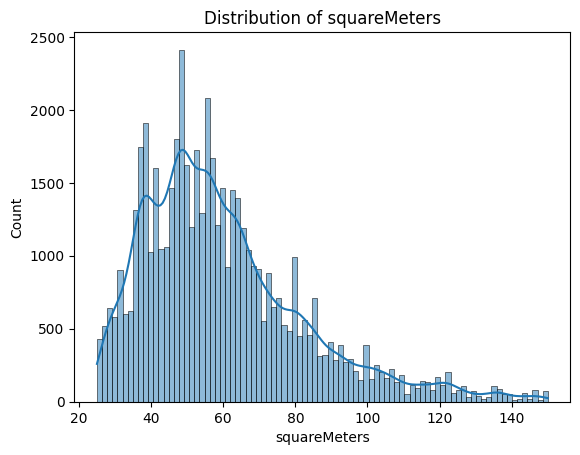

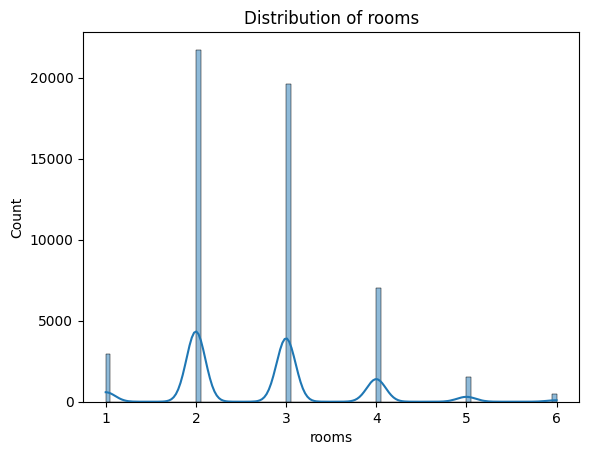

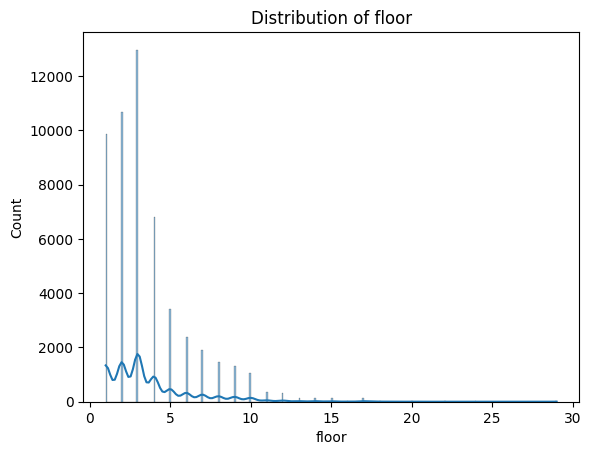

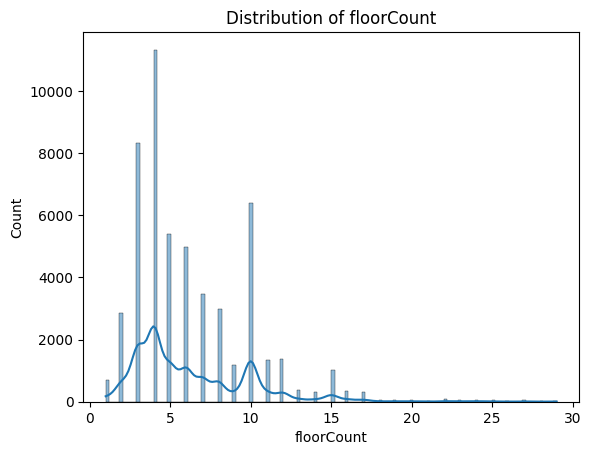

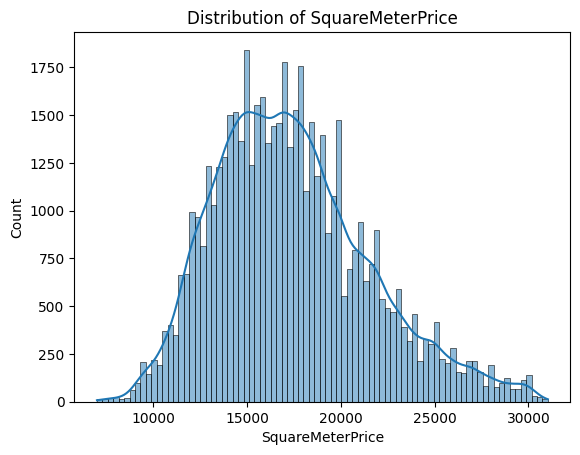

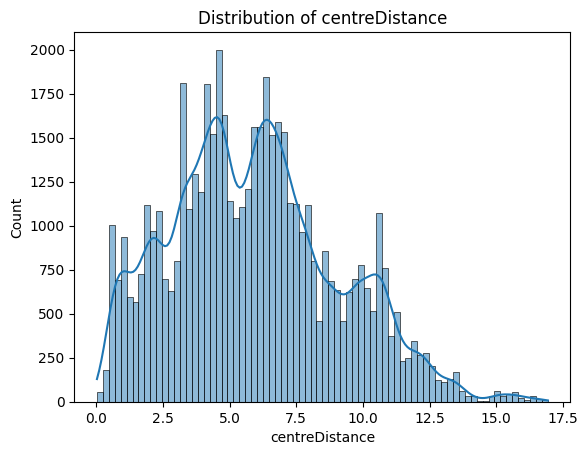

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in outlier_columns:
    sns.histplot(data[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()



Handling Outliers: Balancing Risks and Benefits
Based on our analysis, we’ve identified several potential outliers in the data, but for now, we’re hesitant to remove them. Take the "floor" feature as an example: while records with floors above 15 could be classified as outliers due to their rarity, they may still provide valuable insights into how higher floors affect property prices. Removing these data points could pose a risk, as we might lose critical information, especially in scenarios where high floors have a significant impact.


The Key Consideration: Our Main Goal
Our primary objective is to train the most accurate model that delivers useful predictions for our clients or audience.


For this experiment, let’s assume that the distribution of our sample data accurately reflects our target users. This means only about 1% of users are likely to be interested in predictions related to the top percentile of properties.


If our model were focused on predicting prices for premium flats catering to affluent individuals, these outliers would become some of the most important data points. Conversely, if our goal is to predict prices for average flats aimed at users with typical income levels, removing the outliers would likely yield a more robust model.


The Statistical Perspective
From a purely statistical standpoint, we can anticipate that a model trained without outliers will likely perform better. According to the normal distribution rule (68-95-99.7), outliers represent just 0.3% of the data. Even if our model were to predict all outliers perfectly, but this caused a 1% drop in accuracy for the rest of the data, the overall accuracy would still decrease.


Hypothesis:
"Outliers cause a 1% reduction in accuracy for the remaining data points."

Example Comparison
With Outliers:

N = 10,000

Accuracy on outliers = 100%

Accuracy on the rest = 94%

10
,
000
×
0.003
×
1
=
30
10,000×0.003×1=30
10
,
000
×
0.997
×
0.94
=
9
,
372
10,000×0.997×0.94=9,372
Total Accuracy = 93.96%
Without Outliers:

N = 10,000 – 10,000 × 0.003 = 9,970

Accuracy on the rest = 95%


Total Accuracy = 95%
From these calculations, we can infer what to expect. Statistically, a model trained without outliers is more likely to perform better.



Conclusion:
While removing outliers means sacrificing a few valuable data points, it ensures that the model’s predictions for 99.7% of the data will be slightly more accurate. Although these numbers are based on the assumption of a normal distribution, they provide a useful perspective on the trade-offs involved in handling outliers.


Our data is not  realy distributed normally, but it is also not very skewed.
so we will use two types of outliers detection alghoritms.

Z score, which works best for normally distributed data, and IQR for more skewed data. This will give us more insights about our data.

In [71]:
outlier_columns

['squareMeters',
 'rooms',
 'floor',
 'floorCount',
 'SquareMeterPrice',
 'centreDistance']

Z score

![Image description](https://images.ctfassets.net/kj4bmrik9d6o/xastpMkx3VsudJq2f36Gp/34be9ed522d7de51212a7cee5f8d38bf/Outlier_Blog_CHARTS_ZScore2.png)


Here's how it works:
Calculate the mean (average) and standard deviation of the dataset.

For each data point, the Z-score is calculated using this formula:

𝑍
=
data point
−
mean
standard deviation
Z=
standard deviation
data point−mean
​



The Z-score tells you how many standard deviations a data point is away from the mean.

Z = 0 means the data point is exactly at the mean.
Z = 1 means the data point is 1 standard deviation above the mean.
Z = -1 means the data point is 1 standard deviation below the mean.
Outliers are usually considered points with Z-scores:

Greater than 3 or less than -3, meaning they are 3 or more standard deviations away from the mean, which is quite far compared to most of the data.

In [72]:
outlier_columns_z=[0]*len(outlier_columns)

In [73]:
for x in range(len(outlier_columns)):
    outlier_columns_z[x]=outlier_columns[x]+"_z"

print(outlier_columns_z[0])


squareMeters_z


In [74]:
data['squareMeters'].iloc[0]

64.9

In [75]:
import numpy as np
from scipy import stats
import pandas as pd

threshold = 3

data['ISoutlier_z']=0


for x in range(len(outlier_columns_z)):
    data[outlier_columns_z[x]]=np.abs(stats.zscore(data[outlier_columns[x]]))
    for y in range(len(data)):
        if( data[outlier_columns_z[x]].iloc[y]>threshold):
            data['ISoutlier_z'].iloc[y]=1


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['ISoutlier_z'].iloc[y]=1
<ipython-input-75-a5b098d148dc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ISoutlier_z'].iloc[y]=1
<ipython-input-75-a5b098d148dc>:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when 

In [76]:
print(f"{data['ISoutlier_z'].value_counts()[1]/len(data)*100}% of data has been declared as outlier")

4.822220551755243% of data has been declared as outlier


In a normal distribution, only about 0.3% of data points are typically more than 3 standard deviations away from the mean, which means that we would expect very few outliers based on Z-scores.


Getting 5% outliers here suggests that  data may not be perfectly normal but is somewhat close to a normal distribution.

IQR

![Image description](https://makemeanalyst.com/wp-content/uploads/2017/05/IQR-1.png)

The IQR method is based on the spread of the middle 50% of the data (between the 1st quartile and 3rd quartile).


If the data is skewed or has long tails (extreme values far from the center), the IQR method will identify more points as outliers because it doesn’t assume a normal distribution.

In [77]:
outlier_columns_IQR=[0]*len(outlier_columns)

In [78]:
for x in range(len(outlier_columns)):
    outlier_columns_IQR[x]=outlier_columns[x]+"_IQR"

print(outlier_columns_IQR)

['squareMeters_IQR', 'rooms_IQR', 'floor_IQR', 'floorCount_IQR', 'SquareMeterPrice_IQR', 'centreDistance_IQR']


In [79]:

data['ISoutlier_IQR']=0




for x in range(len(outlier_columns_IQR)):

    Q1 = data[outlier_columns[x]].quantile(0.25)
    Q3 = data[outlier_columns[x]].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR



    for y in range(len(data)):
        if(data[outlier_columns[x]].iloc[y] < lower_bound) or (data[outlier_columns[x]].iloc[y] > upper_bound):
            data['ISoutlier_IQR'].iloc[y] = 1




Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['ISoutlier_IQR'].iloc[y] = 1
<ipython-input-79-1d4ce163b77c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ISoutlier_IQR'].iloc[y] = 1
<ipython-input-79-1d4ce163b77c>:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example 

In [80]:
print(f"{data['ISoutlier_IQR'].value_counts()[1]/len(data)*100}% of data has been declared as outlier")

18.086145982109297% of data has been declared as outlier


With 18% of our data flagged as outliers by the IQR method, it suggests that  data has more extreme values (or long tails), which is common in skewed distributions.

That is why we should use IQR to find outliers in our data, it is more appropiate to our data distribution than Z score method.

In [81]:
len(data)

53212

In [82]:
data_without_outliers = data[data['ISoutlier_IQR'] != 1]

In [83]:
len(data_without_outliers)

43588

Droping outliers

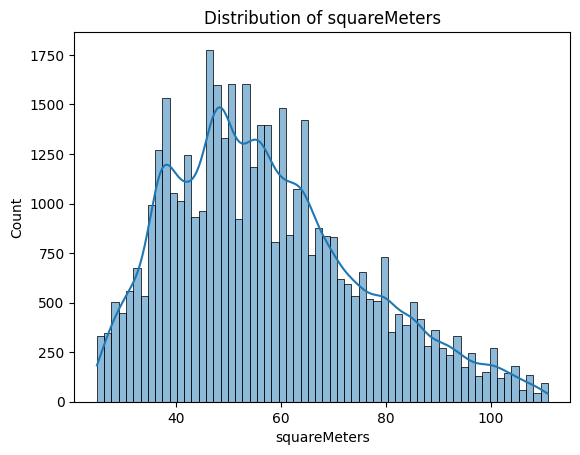

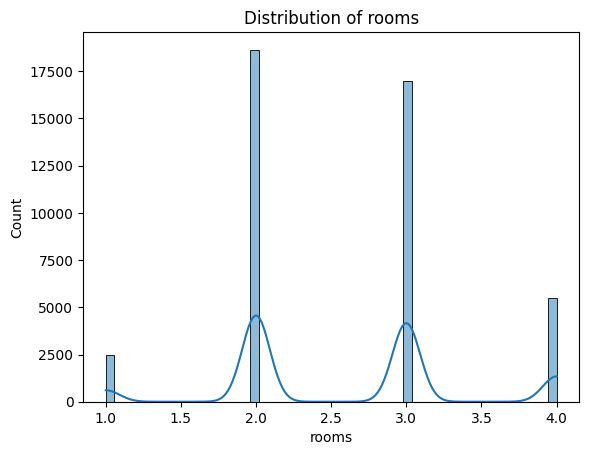

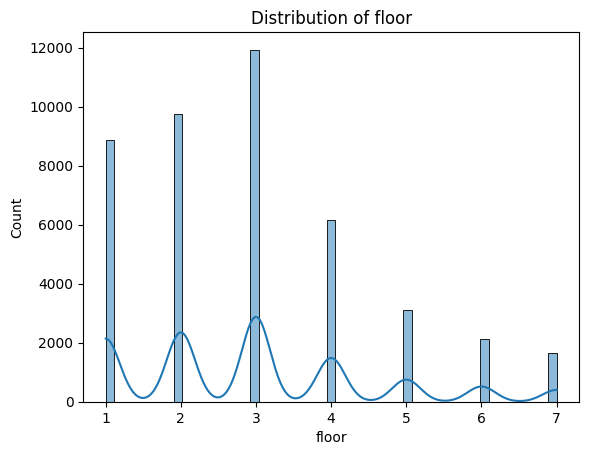

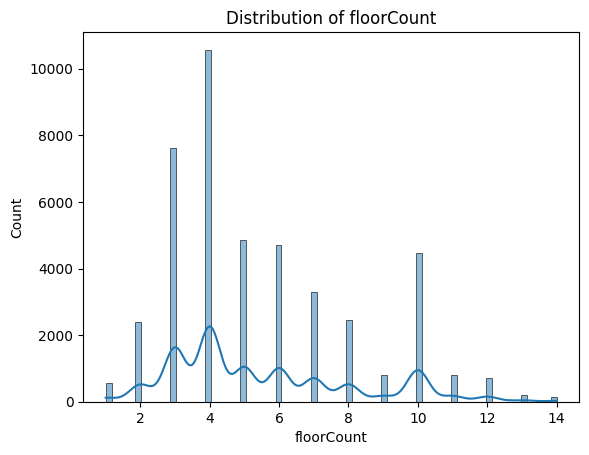

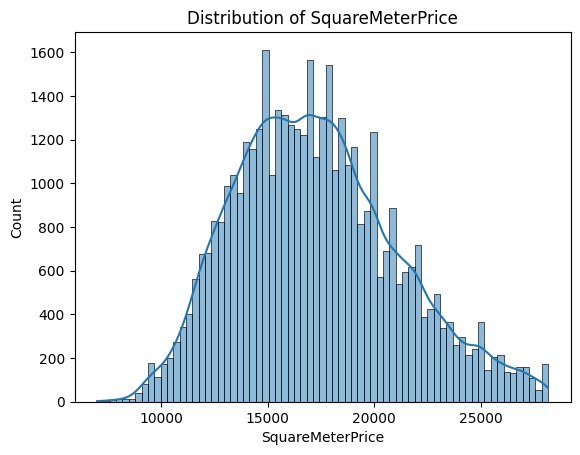

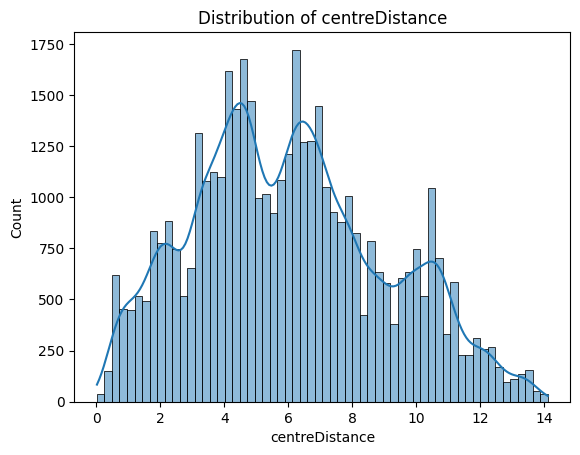

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in outlier_columns:
    sns.histplot(data_without_outliers[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()



Now our data is much more normally distributed, but there is one issue, 18% of data is realy a lot, and as we can see in some columns (floor,floorcount), about third of data categories was labeled as outliers. It is bit too harsh.

In the floor column, we now have only floors to 7, but on previous graphs we can clearly see that real, outliers start somehere beetween near 10th floor. Same situation with floorcount.

WE should change range of percentile of data to drop.

75->77

In [85]:

data['ISoutlier_IQR']=0




for x in range(len(outlier_columns_IQR)):

    Q1 = data[outlier_columns[x]].quantile(0.25)
    Q3 = data[outlier_columns[x]].quantile(0.77)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR



    for y in range(len(data)):
        if(data[outlier_columns[x]].iloc[y] < lower_bound) or (data[outlier_columns[x]].iloc[y] > upper_bound):
            data['ISoutlier_IQR'].iloc[y] = 1




Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['ISoutlier_IQR'].iloc[y] = 1
<ipython-input-85-d7963064fce8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ISoutlier_IQR'].iloc[y] = 1
<ipython-input-85-d7963064fce8>:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example 

In [86]:
print(f"{data['ISoutlier_IQR'].value_counts()[1]/len(data)*100}% of data has been declared as outlier")

11.192963993084266% of data has been declared as outlier


In [87]:
data_without_outliers = data[data['ISoutlier_IQR'] != 1]

In [88]:
len(data_without_outliers)

47256

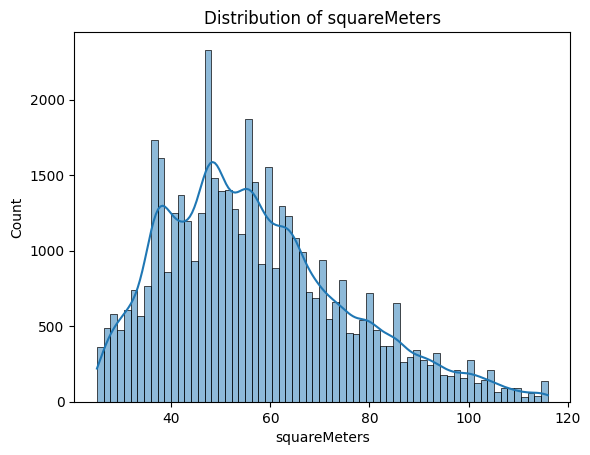

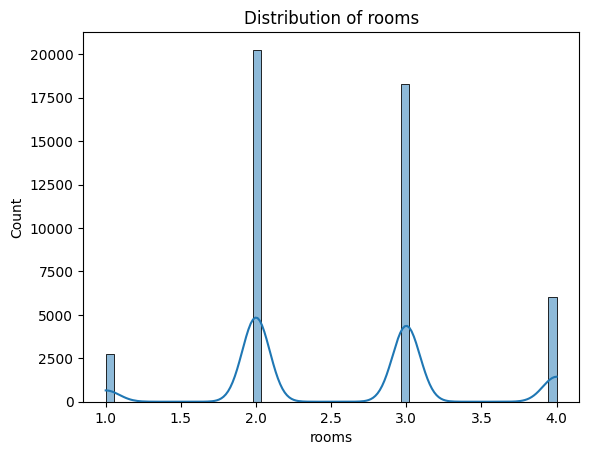

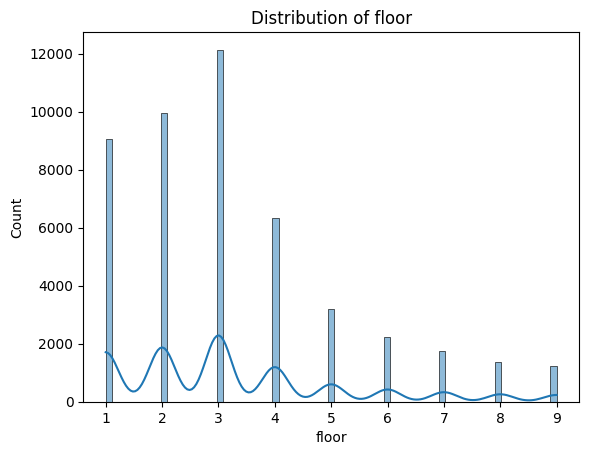

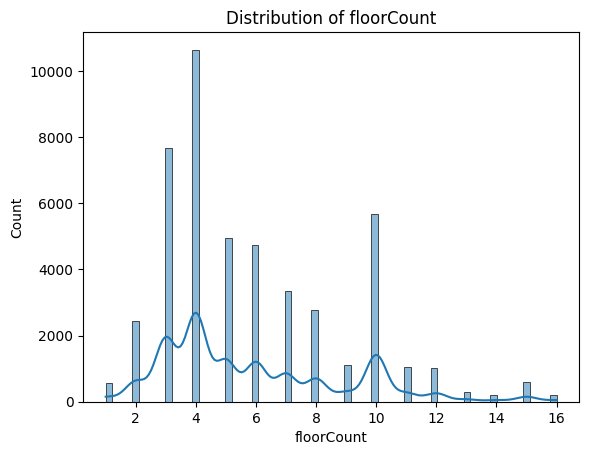

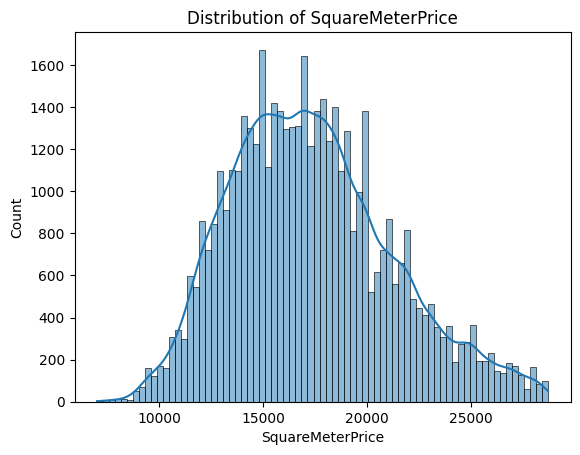

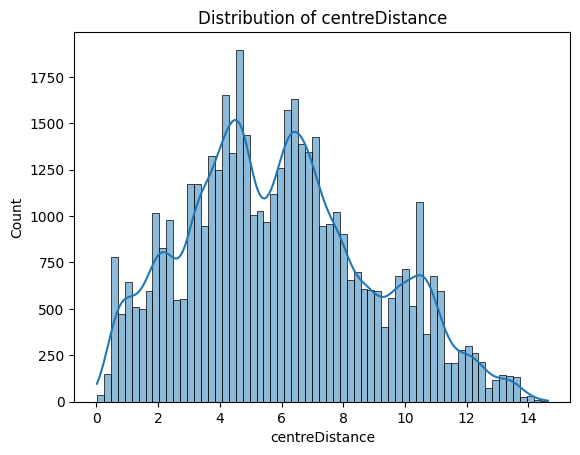

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in outlier_columns:
    sns.histplot(data_without_outliers[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()



In [90]:
data=data_without_outliers

In [91]:
columns_to_drop = ['ISoutlier_z', 'squareMeters_z', 'rooms_z', 'floor_z', 'floorCount_z',
                   'SquareMeterPrice_z', 'centreDistance_z', 'ISoutlier_IQR']

data = data.drop(columns=columns_to_drop)

We changed last quartile size by only two percentiles and from 18% outliers now it is only 11%. Thanks to this change, columns where outlier identifcation were to harsh, are better represented, for example floor is now up to 9, which is realy close to 10 where we visualy identifed big drop of quantity of rows.

In [92]:
import os


save_directory = '/content/drive/MyDrive/Warsaw_Real_Estate/PREPROCESSED_DATA/'
save_filename = 'Preprocesed_data.csv'

csv_path = os.path.join(save_directory, save_filename)


data.to_csv(csv_path, index=False)

print(f"DataFrame saved to: {csv_path}")


DataFrame saved to: /content/drive/MyDrive/Warsaw_Real_Estate/PREPROCESSED_DATA/Preprocesed_data.csv
